In [3]:
%run ../scripts/dataset_creation.py

In [4]:
%who_ls

['create_final_df', 'final_df']

In [5]:
final_df

,Starting week,Year,UK L'Oreal Paris Haircare Offline Average Price (in pound),UK L'Oreal Paris Haircare Online Average Price (in pound),UK L'Oreal Paris Haircare Total Weigheted Promotion Distribution (%),UK L'Oreal Paris Haircare Total Offline Sellout Value (in pound),UK L'Oreal Paris Haircare Total Offline Sellout Units,UK L'Oreal Paris Haircare Total Online Sellout Value (in pound),UK L'Oreal Paris Haircare Total Online Sellout Units,Starting week,...,spend_tesco,spend_the_hut_group,spend_tik_tok,spend_youtube,Starting week,engagement_influencer_management,spend_influencer_management,Starting week,grp_linear,spend_linear
0,2022-01-03,2022,2.323822,3.242071,0.37,1583364.9,681362.5,362750.18,111888.4,2022-01-03,...,0.000,0.0,0.0,0.0,2022-01-03,537.216943,107.438017,2022-01-03,0.00,0.0
1,2022-01-10,2022,2.328649,2.978819,0.42,1753588.2,753049.7,385263.71,129334.4,2022-01-10,...,0.000,0.0,0.0,0.0,2022-01-10,0.000000,0.000000,2022-01-10,0.00,0.0
2,2022-01-17,2022,2.378280,3.014039,0.43,1690696.8,710890.7,359523.06,119282.8,2022-01-17,...,0.000,0.0,0.0,0.0,2022-01-17,0.000000,0.000000,2022-01-17,0.00,0.0
3,2022-01-24,2022,2.396989,3.077403,0.86,1748572.8,729487.2,357843.85,116281.1,2022-01-24,...,0.000,0.0,0.0,0.0,2022-01-24,142432.121596,28484.999998,2022-01-24,58.63,169674.7
4,2022-01-31,2022,2.394615,3.306272,0.78,1768055.9,738346.7,386416.94,116873.9,2022-01-31,...,0.000,0.0,0.0,0.0,2022-01-31,95869.369418,19172.915190,2022-01-31,100.49,292321.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2023-11-27,2023,3.067400,3.771592,0.91,2472870.4,806178.1,511228.38,135547.1,2023-11-27,...,21208.889,0.0,0.0,0.0,2023-11-27,0.000000,0.000000,2023-11-27,0.00,0.0
100,2023-12-04,2023,3.039699,3.784533,0.81,2464104.5,810641.0,483836.99,127845.9,2023-12-04,...,34548.917,0.0,0.0,0.0,2023-12-04,0.000000,0.000000,2023-12-04,0.00,0.0
101,2023-12-11,2023,3.057034,3.836532,0.81,2686708.7,878861.1,502614.45,131007.5,2023-12-11,...,34548.917,0.0,0.0,0.0,2023-12-11,0.000000,0.000000,2023-12-11,0.00,0.0
102,2023-12-18,2023,3.176955,3.939211,0.86,3397529.2,1069429.4,463530.08,117670.8,2023-12-18,...,34548.917,0.0,0.0,0.0,2023-12-18,0.000000,0.000000,2023-12-18,0.00,0.0


In [6]:
final_df.columns

Index(['Starting week', 'Year',
       'UK L'Oreal Paris Haircare Offline Average Price (in pound)',
       'UK L'Oreal Paris Haircare Online Average Price (in pound)',
       'UK L'Oreal Paris Haircare Total Weigheted Promotion Distribution (%)',
       'UK L'Oreal Paris Haircare Total Offline Sellout Value (in pound)',
       'UK L'Oreal Paris Haircare Total Offline Sellout Units',
       'UK L'Oreal Paris Haircare Total Online Sellout Value (in pound)',
       'UK L'Oreal Paris Haircare Total Online Sellout Units', 'Starting week',
       'impressions_amazon', 'impressions_amazon_retail', 'impressions_bvod',
       'impressions_citrus', 'impressions_criteo', 'impressions_google',
       'impressions_google_video', 'impressions_meta',
       'impressions_meta_collab_ads', 'impressions_pinterest',
       'impressions_tesco', 'impressions_the_hut_group', 'impressions_tik_tok',
       'impressions_youtube', 'spend_amazon', 'spend_amazon_retail',
       'spend_bvod', 'spend_citrus', 'spe

In [46]:
cols_spend = [col for col in final_df.columns if col.startswith('spend')]
cols_spend

['spend_amazon',
 'spend_amazon_retail',
 'spend_bvod',
 'spend_citrus',
 'spend_criteo',
 'spend_google',
 'spend_google_video',
 'spend_meta',
 'spend_meta_collab_ads',
 'spend_pinterest',
 'spend_tesco',
 'spend_the_hut_group',
 'spend_tik_tok',
 'spend_youtube',
 'spend_influencer_management',
 'spend_linear']

<Axes: >

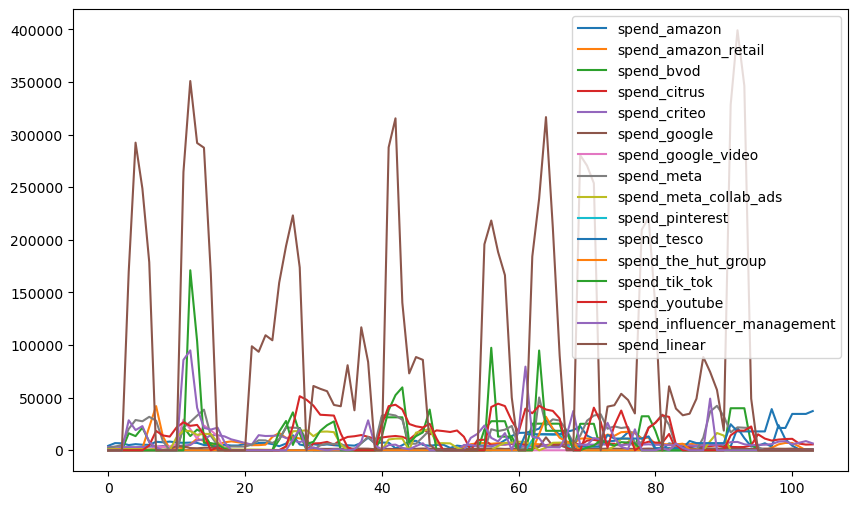

In [47]:
final_df[cols_spend].plot(figsize=(10,6))

In [34]:
final_df[["Year"] +cols_spend ].groupby("Year")\
    .sum().T.columns

Index([2022, 2023], dtype='int64', name='Year')

<Axes: >

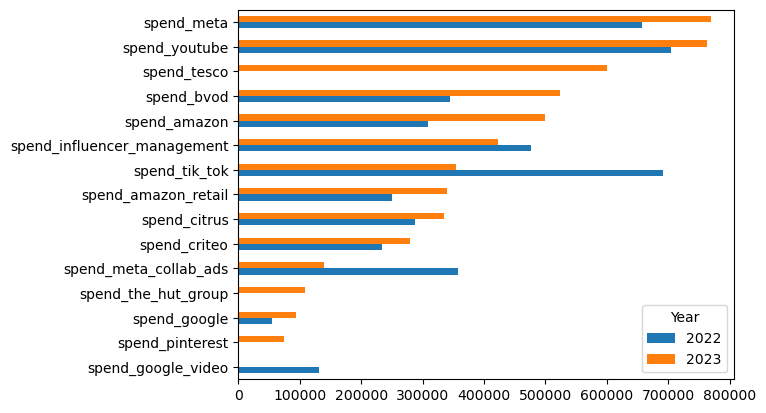

In [37]:
final_df[["Year"] +cols_spend ].groupby("Year")\
    .sum().T.sort_values(by=2023)\
    .plot(kind="barh")

<Axes: xlabel='Year'>

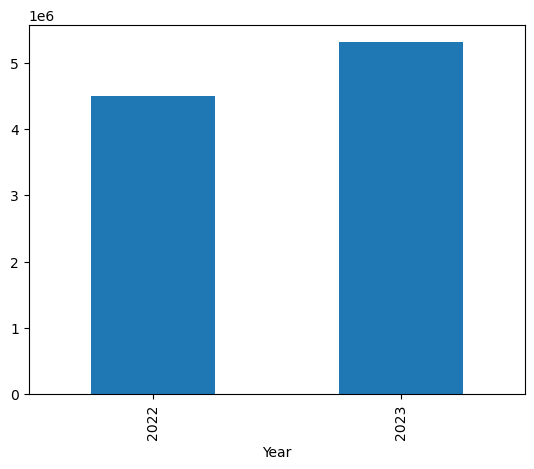

In [43]:
final_df[["Year"] +cols_spend ].groupby("Year")\
    .sum().sum(axis=1).plot(kind="bar")

In [50]:
final_df[["Year"] +cols_spend ].groupby("Year")\
    .sum().sum(axis=1).pct_change()

Year
2022         NaN
2023    0.089921
dtype: float64

In [45]:
final_df["Starting week"].min(), final_df["Starting week"].max()

(Starting week   2022-01-03
 Starting week   2022-01-03
 Starting week   2022-01-03
 Starting week   2022-01-03
 dtype: datetime64[ns],
 Starting week   2023-12-25
 Starting week   2023-12-25
 Starting week   2023-12-25
 Starting week   2023-12-25
 dtype: datetime64[ns])

<Axes: ylabel='Category'>

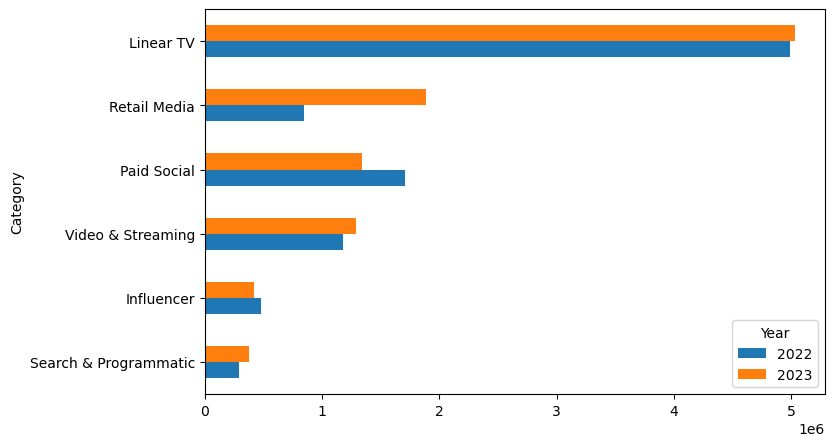

In [48]:
spend_categories = {
    "Retail Media": [
        "spend_amazon",
        "spend_amazon_retail",
        "spend_tesco",
        "spend_the_hut_group",
        "spend_citrus",
    ],

    "Paid Social": [
        "spend_meta",
        "spend_meta_collab_ads",
        "spend_tik_tok",
        "spend_pinterest",
    ],

    "Video & Streaming": [
        "spend_youtube",
        "spend_google_video",
        "spend_bvod",
    ],

    "Search & Programmatic": [
        "spend_google",
        "spend_criteo",
    ],

    "Influencer": [
        "spend_influencer_management",
    ],

    "Linear TV": [
        "spend_linear",
    ],
}


spend_to_category = {
    spend: category
    for category, spends in spend_categories.items()
    for spend in spends
}


cols_spend = list(spend_to_category.keys())

plot_df = (
    final_df[["Year"] + cols_spend]
    .groupby("Year")
    .sum()
    .T
)

plot_df["Category"] = plot_df.index.map(spend_to_category)

(
    plot_df
    .groupby("Category")
    .sum()
    .sort_values(by=2023)
    .plot(kind="barh", figsize=(8,5))
)


In [54]:
cols_spend = [col for col in final_df.columns if col.startswith('spend')]
cols_spend

['spend_amazon',
 'spend_amazon_retail',
 'spend_bvod',
 'spend_citrus',
 'spend_criteo',
 'spend_google',
 'spend_google_video',
 'spend_meta',
 'spend_meta_collab_ads',
 'spend_pinterest',
 'spend_tesco',
 'spend_the_hut_group',
 'spend_tik_tok',
 'spend_youtube',
 'spend_influencer_management',
 'spend_linear']

In [66]:
final_df.columns

Index(['Starting week', 'Year',
       'UK L'Oreal Paris Haircare Offline Average Price (in pound)',
       'UK L'Oreal Paris Haircare Online Average Price (in pound)',
       'UK L'Oreal Paris Haircare Total Weigheted Promotion Distribution (%)',
       'UK L'Oreal Paris Haircare Total Offline Sellout Value (in pound)',
       'UK L'Oreal Paris Haircare Total Offline Sellout Units',
       'UK L'Oreal Paris Haircare Total Online Sellout Value (in pound)',
       'UK L'Oreal Paris Haircare Total Online Sellout Units', 'Starting week',
       'impressions_amazon', 'impressions_amazon_retail', 'impressions_bvod',
       'impressions_citrus', 'impressions_criteo', 'impressions_google',
       'impressions_google_video', 'impressions_meta',
       'impressions_meta_collab_ads', 'impressions_pinterest',
       'impressions_tesco', 'impressions_the_hut_group', 'impressions_tik_tok',
       'impressions_youtube', 'spend_amazon', 'spend_amazon_retail',
       'spend_bvod', 'spend_citrus', 'spe

In [68]:
final_df["Starting week"].iloc[:,0]

0     2022-01-03
1     2022-01-10
2     2022-01-17
3     2022-01-24
4     2022-01-31
         ...    
99    2023-11-27
100   2023-12-04
101   2023-12-11
102   2023-12-18
103   2023-12-25
Name: Starting week, Length: 104, dtype: datetime64[ns]

<Axes: xlabel='Starting week'>

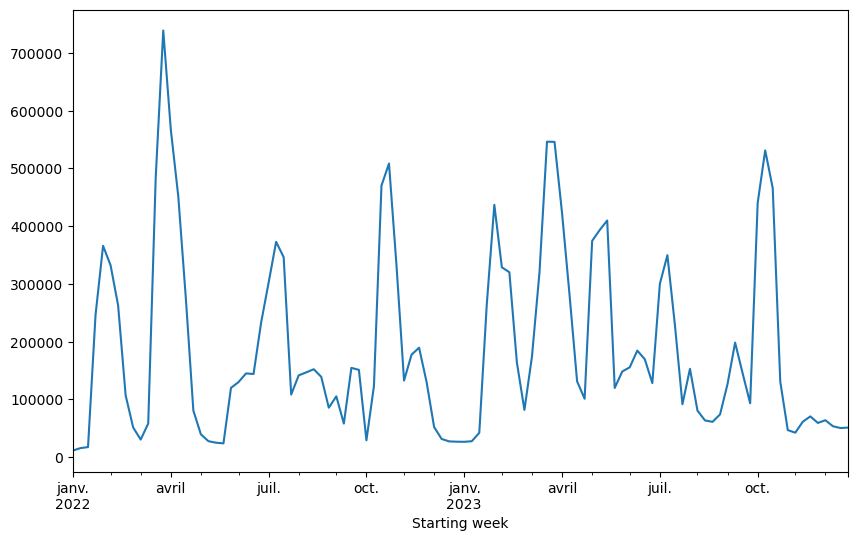

In [75]:
cols_spend = [col for col in final_df.columns if col.startswith('spend')]
pd.concat([final_df["Starting week"].iloc[:,0],
           final_df[cols_spend]], axis=1)\
           .set_index("Starting week")\
           .sum(axis=1)\
           .plot(figsize=(10,6))

In [77]:
final_df

,Starting week,Year,UK L'Oreal Paris Haircare Offline Average Price (in pound),UK L'Oreal Paris Haircare Online Average Price (in pound),UK L'Oreal Paris Haircare Total Weigheted Promotion Distribution (%),UK L'Oreal Paris Haircare Total Offline Sellout Value (in pound),UK L'Oreal Paris Haircare Total Offline Sellout Units,UK L'Oreal Paris Haircare Total Online Sellout Value (in pound),UK L'Oreal Paris Haircare Total Online Sellout Units,Starting week,...,spend_tesco,spend_the_hut_group,spend_tik_tok,spend_youtube,Starting week,engagement_influencer_management,spend_influencer_management,Starting week,grp_linear,spend_linear
0,2022-01-03,2022,2.323822,3.242071,0.37,1583364.9,681362.5,362750.18,111888.4,2022-01-03,...,0.000,0.0,0.0,0.0,2022-01-03,537.216943,107.438017,2022-01-03,0.00,0.0
1,2022-01-10,2022,2.328649,2.978819,0.42,1753588.2,753049.7,385263.71,129334.4,2022-01-10,...,0.000,0.0,0.0,0.0,2022-01-10,0.000000,0.000000,2022-01-10,0.00,0.0
2,2022-01-17,2022,2.378280,3.014039,0.43,1690696.8,710890.7,359523.06,119282.8,2022-01-17,...,0.000,0.0,0.0,0.0,2022-01-17,0.000000,0.000000,2022-01-17,0.00,0.0
3,2022-01-24,2022,2.396989,3.077403,0.86,1748572.8,729487.2,357843.85,116281.1,2022-01-24,...,0.000,0.0,0.0,0.0,2022-01-24,142432.121596,28484.999998,2022-01-24,58.63,169674.7
4,2022-01-31,2022,2.394615,3.306272,0.78,1768055.9,738346.7,386416.94,116873.9,2022-01-31,...,0.000,0.0,0.0,0.0,2022-01-31,95869.369418,19172.915190,2022-01-31,100.49,292321.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2023-11-27,2023,3.067400,3.771592,0.91,2472870.4,806178.1,511228.38,135547.1,2023-11-27,...,21208.889,0.0,0.0,0.0,2023-11-27,0.000000,0.000000,2023-11-27,0.00,0.0
100,2023-12-04,2023,3.039699,3.784533,0.81,2464104.5,810641.0,483836.99,127845.9,2023-12-04,...,34548.917,0.0,0.0,0.0,2023-12-04,0.000000,0.000000,2023-12-04,0.00,0.0
101,2023-12-11,2023,3.057034,3.836532,0.81,2686708.7,878861.1,502614.45,131007.5,2023-12-11,...,34548.917,0.0,0.0,0.0,2023-12-11,0.000000,0.000000,2023-12-11,0.00,0.0
102,2023-12-18,2023,3.176955,3.939211,0.86,3397529.2,1069429.4,463530.08,117670.8,2023-12-18,...,34548.917,0.0,0.0,0.0,2023-12-18,0.000000,0.000000,2023-12-18,0.00,0.0


In [78]:
cols_impression = [col for col in final_df.columns if col.startswith('impression')]


In [80]:
brands = [col.split("impressions_")[1] for col in cols_impression]
brands

['amazon',
 'amazon_retail',
 'bvod',
 'citrus',
 'criteo',
 'google',
 'google_video',
 'meta',
 'meta_collab_ads',
 'pinterest',
 'tesco',
 'the_hut_group',
 'tik_tok',
 'youtube']

In [82]:
pd.concat([final_df["Starting week"].iloc[:,0],
           final_df[cols_spend + cols_impression]], axis=1)


,Starting week,spend_amazon,spend_amazon_retail,spend_bvod,spend_citrus,spend_criteo,spend_google,spend_google_video,spend_meta,spend_meta_collab_ads,...,impressions_criteo,impressions_google,impressions_google_video,impressions_meta,impressions_meta_collab_ads,impressions_pinterest,impressions_tesco,impressions_the_hut_group,impressions_tik_tok,impressions_youtube
0,2022-01-03,4245.110998,613.431,0.000000,0.000,3053.209640,374.884674,0.0,2322.307000,918.38565,...,156076.7,4067.7,0.0,1289454.4,1507673.7,0.0,0.000,0.0,0.0,0.0
1,2022-01-10,6786.949015,1065.064,0.000000,0.000,3387.968876,333.488566,0.0,3375.190000,867.26952,...,161675.8,3716.7,0.0,2106572.0,1662391.9,0.0,0.000,0.0,0.0,0.0
2,2022-01-17,6653.399975,1354.821,0.000000,0.000,3045.849565,371.129451,0.0,5137.405000,1019.38005,...,408499.0,4264.0,0.0,2869640.8,1781321.1,0.0,0.000,0.0,0.0,0.0
3,2022-01-24,4944.758000,2428.517,16158.513010,0.000,2990.311483,360.270269,0.0,20303.140000,1101.75156,...,684980.4,4633.2,0.0,11263612.1,1750936.2,0.0,0.000,0.0,0.0,0.0
4,2022-01-31,5821.348005,2262.923,13465.429227,0.000,2979.300479,237.652458,0.0,28768.727013,987.27993,...,1074118.5,2134.6,0.0,15033348.2,1959865.7,0.0,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2023-11-27,10447.814000,6967.649,0.000000,10691.603,8660.379000,1410.916000,0.0,0.000000,0.00000,...,429973.7,26319.8,0.0,0.0,0.0,0.0,3038705.800,0.0,0.0,0.0
100,2023-12-04,4372.979000,6961.994,0.000000,10878.283,5751.850000,1576.926000,0.0,0.000000,0.00000,...,427765.0,30949.1,0.0,0.0,0.0,0.0,5438082.650,0.0,0.0,0.0
101,2023-12-11,838.552000,3631.017,0.000000,6374.641,7118.384000,1147.926000,0.0,0.000000,0.00000,...,394867.2,23582.0,0.0,0.0,0.0,0.0,5438082.650,0.0,0.0,0.0
102,2023-12-18,891.917000,0.000,0.000000,5420.545,8714.498000,1003.444000,0.0,0.000000,0.00000,...,519266.8,23169.9,0.0,0.0,0.0,0.0,5438082.650,0.0,0.0,0.0


In [83]:
pd.concat([final_df["Starting week"].iloc[:,0],
           final_df[cols_spend + cols_impression]], axis=1).columns


Index(['Starting week', 'spend_amazon', 'spend_amazon_retail', 'spend_bvod',
       'spend_citrus', 'spend_criteo', 'spend_google', 'spend_google_video',
       'spend_meta', 'spend_meta_collab_ads', 'spend_pinterest', 'spend_tesco',
       'spend_the_hut_group', 'spend_tik_tok', 'spend_youtube',
       'spend_influencer_management', 'spend_linear', 'impressions_amazon',
       'impressions_amazon_retail', 'impressions_bvod', 'impressions_citrus',
       'impressions_criteo', 'impressions_google', 'impressions_google_video',
       'impressions_meta', 'impressions_meta_collab_ads',
       'impressions_pinterest', 'impressions_tesco',
       'impressions_the_hut_group', 'impressions_tik_tok',
       'impressions_youtube'],
      dtype='object')

In [103]:
def compute_spend_impression_ratio(df, cols_spend, cols_impression):
    """
    Calcule spend / impressions pour chaque brand
    Retourne un DataFrame avec une colonne par brand
    """

    brands = [col.replace("impressions_", "") for col in cols_impression]
    ratio_df = pd.DataFrame(index=df.index)

    for brand in brands:
        spend_col = f"spend_{brand}"
        imp_col = f"impressions_{brand}"

        if spend_col in df.columns and imp_col in df.columns:
            ratio_df[f"ratio_{brand}"] = df[imp_col] / df[spend_col]
        else:
            ratio_df[f"ratio_{brand}"] = np.nan

    return ratio_df



ratio_df = compute_spend_impression_ratio(
    final_df,
    cols_spend,
    cols_impression
)

ratio_df.head()


,ratio_amazon,ratio_amazon_retail,ratio_bvod,ratio_citrus,ratio_criteo,ratio_google,ratio_google_video,ratio_meta,ratio_meta_collab_ads,ratio_pinterest,ratio_tesco,ratio_the_hut_group,ratio_tik_tok,ratio_youtube
0,346.024615,315.025325,NaN,NaN,51.118894,10.850537,NaN,555.247174,1641.656422,NaN,NaN,NaN,NaN,NaN
1,364.596521,322.579582,NaN,NaN,47.720568,11.144910,NaN,624.134345,1916.811166,NaN,NaN,NaN,NaN,NaN
2,404.487887,330.934492,NaN,NaN,134.116604,11.489253,NaN,558.577881,1747.455328,NaN,NaN,NaN,NaN,NaN
3,392.347108,257.897103,50.444127,NaN,229.066572,12.860345,NaN,554.771927,1589.229608,NaN,NaN,NaN,NaN,NaN
4,403.570152,273.979009,50.444127,NaN,360.527079,8.982024,NaN,522.558686,1985.116521,NaN,NaN,NaN,NaN,NaN


In [104]:
ratio_df = pd.concat(
    [
        final_df["Starting week"].iloc[:,0],
     ratio_df],
    axis=1
)


In [97]:
ratio_df

,Starting week,ratio_amazon,ratio_amazon_retail,ratio_bvod,ratio_citrus,ratio_criteo,ratio_google,ratio_google_video,ratio_meta,ratio_meta_collab_ads,ratio_pinterest,ratio_tesco,ratio_the_hut_group,ratio_tik_tok,ratio_youtube
0,2022-01-03,0.002890,0.003174,NaN,NaN,0.019562,0.092161,NaN,0.001801,0.000609,NaN,NaN,NaN,NaN,NaN
1,2022-01-10,0.002743,0.003100,NaN,NaN,0.020955,0.089727,NaN,0.001602,0.000522,NaN,NaN,NaN,NaN,NaN
2,2022-01-17,0.002472,0.003022,NaN,NaN,0.007456,0.087038,NaN,0.001790,0.000572,NaN,NaN,NaN,NaN,NaN
3,2022-01-24,0.002549,0.003878,0.019824,NaN,0.004366,0.077758,NaN,0.001803,0.000629,NaN,NaN,NaN,NaN,NaN
4,2022-01-31,0.002478,0.003650,0.019824,NaN,0.002774,0.111333,NaN,0.001914,0.000504,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2023-11-27,0.003476,0.001863,NaN,0.037231,0.020142,0.053607,NaN,NaN,NaN,NaN,0.006980,NaN,NaN,NaN
100,2023-12-04,0.004221,0.001897,NaN,0.041054,0.013446,0.050952,NaN,NaN,NaN,NaN,0.006353,NaN,NaN,NaN
101,2023-12-11,0.004283,0.001926,NaN,0.032122,0.018027,0.048678,NaN,NaN,NaN,NaN,0.006353,NaN,NaN,NaN
102,2023-12-18,0.004338,NaN,NaN,0.027678,0.016782,0.043308,NaN,NaN,NaN,NaN,0.006353,NaN,NaN,NaN


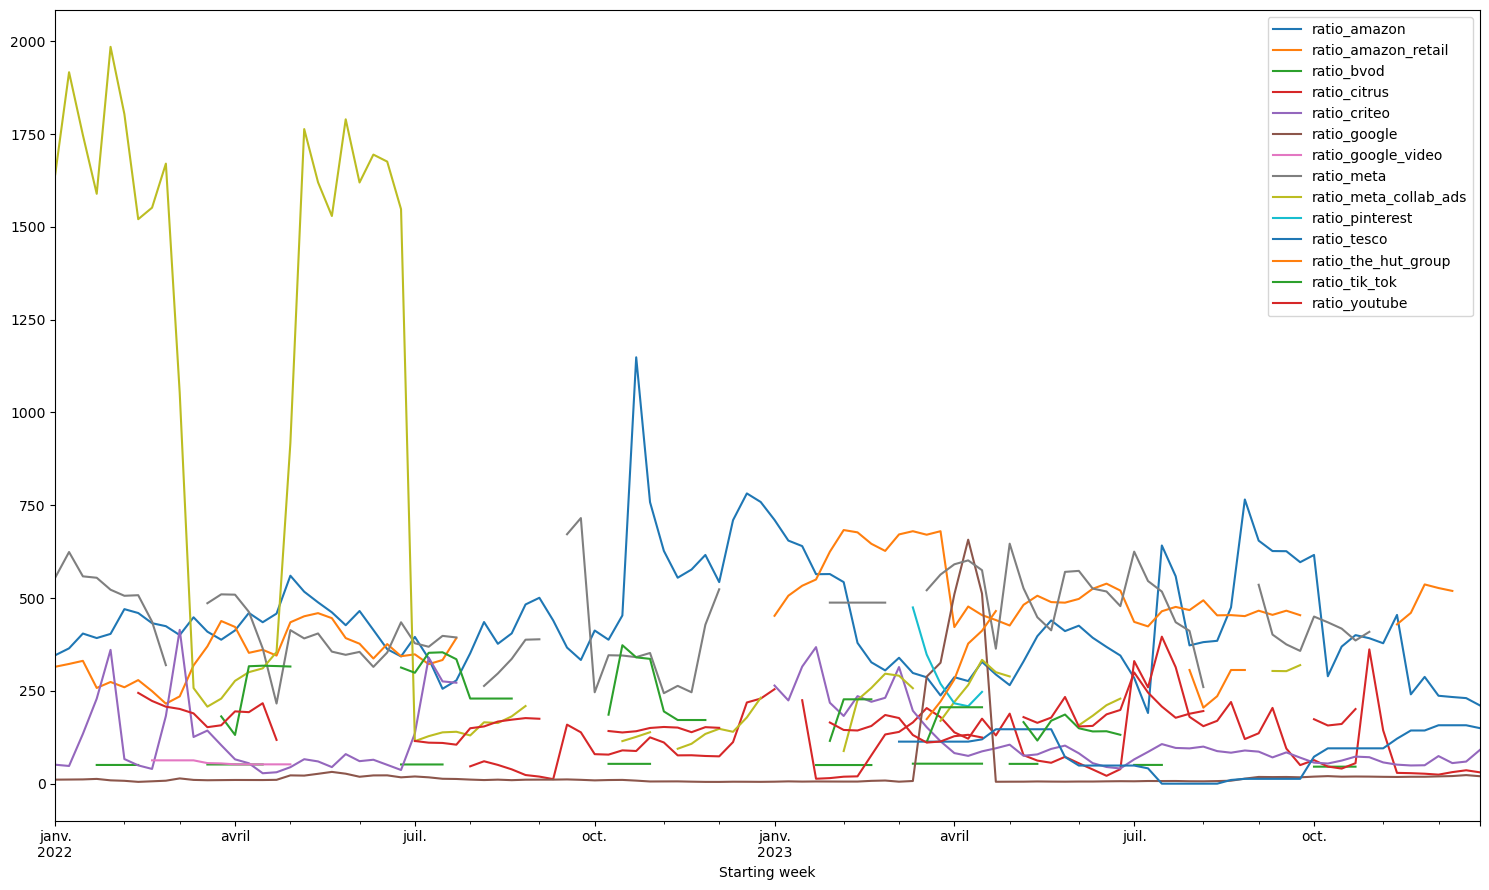

In [105]:
import matplotlib.pyplot as plt
ratio_df.set_index("Starting week").plot(figsize=(15,9))

plt.tight_layout()

In [107]:
[col for col in final_df.columns if col.startswith("UK")]

["UK L'Oreal Paris Haircare Offline Average Price (in pound)",
 "UK L'Oreal Paris Haircare Online Average Price (in pound)",
 "UK L'Oreal Paris Haircare Total Weigheted Promotion Distribution (%)",
 "UK L'Oreal Paris Haircare Total Offline Sellout Value (in pound)",
 "UK L'Oreal Paris Haircare Total Offline Sellout Units",
 "UK L'Oreal Paris Haircare Total Online Sellout Value (in pound)",
 "UK L'Oreal Paris Haircare Total Online Sellout Units"]

In [108]:
len(brands)

14

<Axes: xlabel='Starting week'>

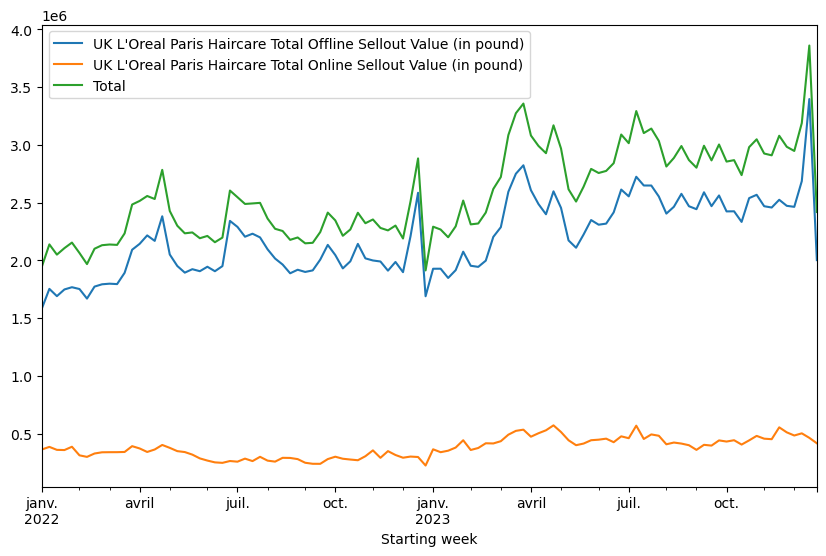

In [121]:
temp = pd.concat([final_df[["UK L'Oreal Paris Haircare Total Offline Sellout Value (in pound)",
           "UK L'Oreal Paris Haircare Total Online Sellout Value (in pound)"]],
                   final_df["Starting week"].iloc[:,0]], axis=1)\
        .set_index("Starting week")

temp["Total"] = temp.sum(axis=1)
temp.plot(figsize=(10,6))